# xG Trendline

Data (StatsBomb via FBref) loaded in manually. Scraped in R using the worldfootballR package.

In [17]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [18]:
#data 

os.chdir("C:/Users/harsh_1mwi2o4/Downloads")
data = pd.read_csv("xgroll.csv")
data.head()

,Competition_Name,Gender,Country,Season_End_Year,Round,Wk,Day,Date,Time,Home,HomeGoals,Home_xG,Away,AwayGoals,Away_xG,Attendance,Venue,Referee,Notes
0,Premier League,M,ENG,2018,NaN,1,Fri,2017-08-11,19:45,Arsenal,4.0,2.3,Leicester City,3.0,1.3,59387.0,Emirates Stadium,Mike Dean,NaN
1,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,12:30,Watford,3.0,2.1,Liverpool,3.0,3.1,20407.0,Vicarage Road Stadium,Anthony Taylor,NaN
2,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,West Brom,1.0,1.2,Bournemouth,0.0,0.4,25011.0,The Hawthorns,Robert Madley,NaN
3,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,Everton,1.0,0.5,Stoke City,0.0,0.3,39045.0,Goodison Park,Niel Swarbrick,NaN
4,Premier League,M,ENG,2018,NaN,1,Sat,2017-08-12,15:00,Southampton,0.0,2.1,Swansea City,0.0,0.5,31447.0,St. Mary's Stadium,Mike Jones,NaN


In [19]:
#basic data wrangling

data1 = data[data["Home"] == "Arsenal"]
data2 = data[data["Away"] == "Arsenal"]

df1 = data1[["Home", "Home_xG", "Date"]]
df2 = data2[["Away", "Away_xG", "Date"]]
df3 = data1[["Away", "Away_xG", "Date"]]
df4 = data2[["Home", "Home_xG", "Date"]]

In [20]:
#renaming columns

df1 = df1.rename(columns= {"Home": "Team", "Home_xG": "xG"})
df2 = df2.rename(columns= {"Away": "Team", "Away_xG": "xG"})
df3 = df3.rename(columns= {"Away": "Team", "Away_xG": "xGA"})
df4 = df4.rename(columns= {"Home": "Team", "Home_xG": "xGA"})

In [21]:
#basic merging and selection

data1 = pd.concat([df1, df2], axis = 0)
data2 = pd.concat([df3, df4], axis = 0)
data2 = data2.drop(["Date", "Team"], axis = 1)

data = pd.concat([data1, data2], axis = 1)
data = data.dropna()
data["No"] = np.arange(data.shape[0])

roll_avg = 15

data["xG"] = data["xG"].rolling(roll_avg).mean()
data["xGA"] = data["xGA"].rolling(roll_avg).mean()
data.tail()

,Team,xG,Date,xGA,No
1610,Arsenal,1.353333,2021-10-30,1.393333,165
1637,Arsenal,1.246667,2021-11-20,1.600000,166
1659,Arsenal,1.306667,2021-12-02,1.626667,167
1669,Arsenal,1.313333,2021-12-06,1.620000,168
1695,Arsenal,1.380000,2021-12-18,1.693333,169


<ipython-input-22-5aad6074812d>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


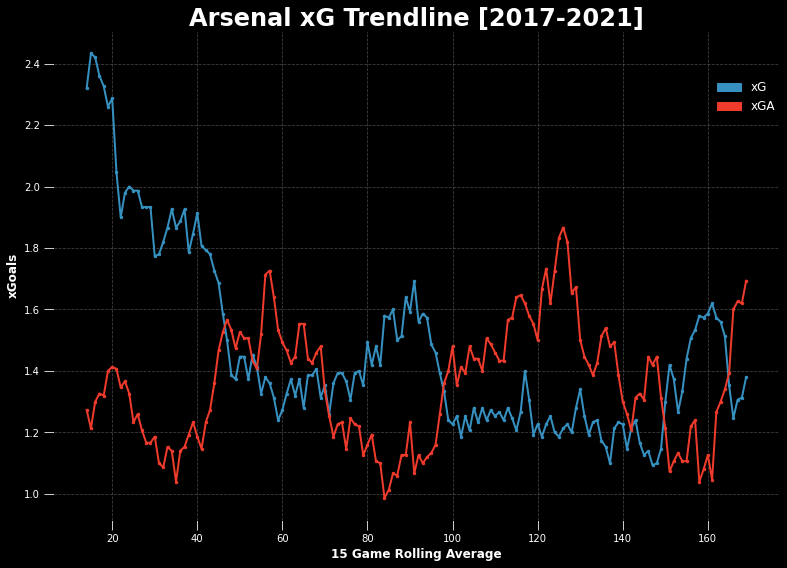

In [22]:
#plotting

xg = mpatches.Patch(color = "#3690c0", label = "xG")
xga = mpatches.Patch(color = "#ef3b2c", label = "xGA")

plt.figure(facecolor = "black")
plt.plot(data["No"], data["xG"], color = "#3690c0", linewidth = 2)
plt.plot(data["No"], data["xGA"], color = "#ef3b2c", linewidth = 2)
plt.scatter(data["No"], data["xG"], color = "#3690c0", s = 6)
plt.scatter(data["No"], data["xGA"], color = "#ef3b2c", s = 6)
plt.title("Arsenal xG Trendline [2017-2021]", color = "white", fontweight = "bold", size = 24, pad = -20)
plt.xlabel(f"{roll_avg} Game Rolling Average", color = "white", fontweight = "bold", size = 12)
plt.ylabel("xGoals", color = "white", fontweight = "bold", size = 12)
plt.grid(color = "grey", linestyle = "dashed", alpha = 0.5)
leg = plt.legend(handles = [xg, xga], frameon = False, prop = {"size": 12}, bbox_to_anchor = (1.01, 0.92))

for text in leg.get_texts():
    text.set_color("white")

ax = plt.axes()
ax.set_facecolor("black")
ax.tick_params(axis='x', colors="white", size = 10)
ax.tick_params(axis='y', colors="white", size = 10)

fig = plt.gcf()
fig.set_size_inches(13, 9)
fig.savefig('xgtrend.png', dpi=700, bbox_inches='tight')